In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

from skimage.transform import resize

PATH = os.getcwd()
print("Currently you're at: ", PATH, "\n")

for dirname, _, filenames in os.walk(PATH):
    print(dirname)

Using TensorFlow backend.


Currently you're at:  /mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Identify_the_Dance_Form 

/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Identify_the_Dance_Form
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Identify_the_Dance_Form/.ipynb_checkpoints
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Identify_the_Dance_Form/dataset
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Identify_the_Dance_Form/dataset/test
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Identify_the_Dance_Form/dataset/train


In [2]:
df_train = pd.read_csv("./dataset/train.csv")
df_submission = pd.read_csv("./dataset/test.csv")

print(df_train.shape, df_submission.shape)

df_train.head()

(364, 2) (156, 1)


,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [3]:
PATH_TRAIN_IMAGE = "./dataset/train/"
PATH_SUBMISSION_IMAGE = "./dataset/test/"

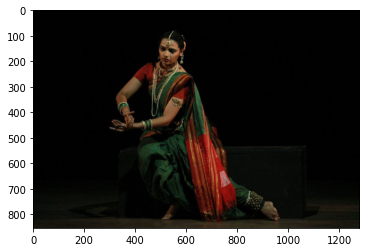

In [4]:
img = plt.imread('./dataset/train/5.jpg')
plt.imshow(img)

In [5]:
image_train = []
for img_name in tqdm(df_train["Image"]):
    img = plt.imread("./dataset/train/"+img_name)
    image_train.append(img)

image_train = np.array(image_train)

image_submission = []
for img_name in tqdm(df_submission["Image"]):
    img = plt.imread("./dataset/test/"+img_name)
    image_submission.append(img)

image_submission = np.array(image_submission)

100%|██████████| 156/156 [00:01<00:00, 96.21it/s] 


In [6]:
temp = []
for i in df_train["target"]:
    if i not in temp:
        temp.append(i)
    
print("No. of Dance Forms: ", len(temp))
print("\n", temp)

No. of Dance Forms:  8

 ['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak', 'sattriya', 'kuchipudi', 'mohiniyattam']


In [7]:
'''
0    mohiniyattam
1    manipuri
2    bharatanatyam
3    odissi
4    kathakali 
5    kathak
6    sattriya 
7    kuchipudi 
'''

y_temp = []

value=0


for i in tqdm(df_train["target"]):
    temp = []
    if i == 'mohiniyattam':
        value = 0
    if i == 'manipuri':
        value = 1
    if i == 'bharatanatyam':
        value = 2
    if i == 'odissi':
        value = 3
    if i == 'kathakali':
        value = 4
    if i == 'kathak':
        value = 5
    if i == 'sattriya':
        value = 6
    if i == 'kuchipudi':
        value = 7

    temp.append(value)
    
    y_temp.append(temp)
    
y = np_utils.to_categorical(y_temp)

100%|██████████| 364/364 [00:00<00:00, 242877.29it/s]


In [8]:
# reshaping images to be used

image = []
for i in trange(0, image_train.shape[0]):
    a = resize(image_train[i], preserve_range=True, output_shape=(224, 224)).astype(int)
    image.append(a)

X = np.array(image)

image = []
for i in trange(0, image_submission.shape[0]):
    a = resize(image_submission[i], preserve_range=True, output_shape=(224, 224)).astype(int)
    image.append(a)

X_submission = np.array(image)

100%|██████████| 156/156 [00:12<00:00, 12.45it/s]


In [9]:
print(X.shape, y.shape)

(364, 224, 224, 3) (364, 8)


In [46]:
from keras.applications.vgg16 import preprocess_input

X = preprocess_input(X, mode='tf')
X_submission = preprocess_input(X_submission, mode='tf')

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

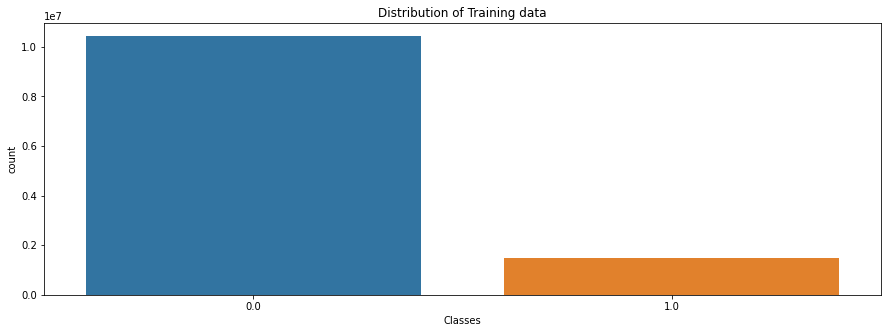

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

sns.countplot(y.ravel(), ax=axs)
axs.set_title('Distribution of Training data')
axs.set_xlabel('Classes')

plt.show()

In [49]:
batch_size = 16
num_classes = 8
epochs = 25
data_augmentation = True

In [50]:
X = X.astype('float32')
X /= 255

X_submission = X_submission.astype('float32')
X_submission /= 255

y = keras.utils.to_categorical(y, num_classes)

In [51]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=X.shape[1:])

In [52]:
X_train = base_model.predict(X_train)
X_test = base_model.predict(X_test)

print(X_train.shape, X_test.shape)

(291, 7, 7, 512) (73, 7, 7, 512)


In [53]:
X_train = X_train.reshape(291, 7*7*512)
X_test = X_test.reshape(73, 7*7*512)

In [54]:
X_train = X_train / X_train.max()
X_test = X_test / X_train.max()

In [35]:
model = Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(units = 1024, activation='sigmoid'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 8200      
Total params: 25,699,336
Trainable params: 25,699,336
Non-trainable params: 0
_________________________________________________________________


In [36]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [38]:
history = None

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_data=(X_test, y_test), shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening = False,
        zca_epsilon = 1e-06,
        rotation_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format = None,
        validation_split=0.0  )
    datagen.fit(X_train)
    history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, 
                                  validation_data=(X_test, y_test))

Using real-time data augmentation.


/home/gaurav/miniconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (291, 7, 7, 512) (512 channels).
  ' channels).')
/home/gaurav/miniconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (291, 7, 7, 512) (512 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


ValueError: Error when checking input: expected input_5 to have 2 dimensions, but got array with shape (73, 7, 7, 512)

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    
    plt.show()
    
print(history.history.keys())

plotmodelhistory(history)